# Classification with Neural Networks

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Image Label : 5


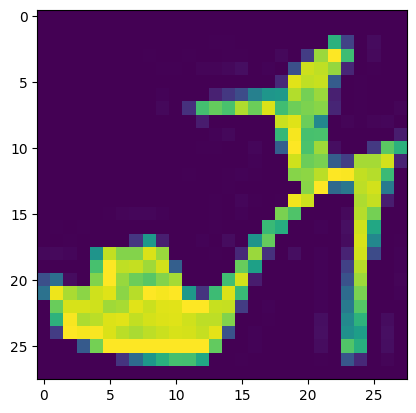

In [2]:
imgIndex = 9
image = xtrain[imgIndex]
print("Image Label :",ytrain[imgIndex])
plt.imshow(image)

In [3]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
])
print(model.summary())


C:\Users\USER\miniconda3\envs\ds4b\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

None


In [5]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[:5000]/255.0
yvalid, ytrain = ytrain[:5000]/255.0, ytrain[:5000]

In [6]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics=["accuracy"])
history = model.fit(xtrain, ytrain, epochs=30,
                   validation_data=(xvalid, yvalid))

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.2554 - loss: 3.3712 - val_accuracy: 0.0000e+00 - val_loss: 18.0639
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0976 - loss: 6.8426 - val_accuracy: 0.0000e+00 - val_loss: 18.0639
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0976 - loss: 6.8425 - val_accuracy: 0.0000e+00 - val_loss: 18.0635
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0976 - loss: 8.0733 - val_accuracy: 0.0000e+00 - val_loss: 17.9099
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0976 - loss: 8.2680 - val_accuracy: 0.0000e+00 - val_loss: 17.9099
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0976 - loss: 8.2680 - val_accuracy: 0.0000e+00 - val_loss: 17.9099
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0976 - loss: 8.2680 - val_accuracy: 0.0000e+00 - val_loss: 17.9099
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accurac

In [7]:
new = xtest[:5]
predictions = model.predict(new)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
[[     0.          0.       1744.8864   2466.2341  37160.547    1103.994
    3765.871    1593.8174      0.          0.    ]
 [     0.          0.       6121.2056   8705.096  127639.47     3077.999
   13245.684    5246.368       0.          0.    ]
 [     0.          0.       4294.097    6181.812   92248.51     2243.1167
    9485.057    3808.6047      0.          0.    ]
 [     0.          0.       2969.3694   4282.6733  63950.645    1558.9495
    6552.636    2695.8813      0.          0.    ]
 [     0.          0.       3858.3806   5489.216   81062.125    1965.4791
    8395.744    3368.7114      0.          0.    ]]
